# Najboljše knjige

#### Projekt pri predmetu programiranje 1

### Uvod

Analiza 500 najboljših knjig iz strani [goodreads](https://www.goodreads.com/list/show/1.Best_Books_Ever?page=1).

Delovne hipoteze:
1. Ali imajo knjige s 300 in manj stranmi višje število točk in višjo povprečno oceno?
2. Ali obstaja povezava med številom glasov in številom prejetih nagrad?
3. Ali ljudje raje berejo fantazijo kot klasiko?
4. Povprečna starost avtorjev, ko je njihova uspešnica izšla, je višja od 40 let.
5. Ocena v odvisnosti od leta

In [2]:
# nalozimo paket pandas za analizo podatkov
import pandas as pd

#nalozimo razpredelnice

knjige = pd.read_csv('obdelani-podatki/knjige.csv', index_col='id')
avtorji = pd.read_csv('obdelani-podatki/avtorji.csv')
osebe = pd.read_csv('obdelani-podatki/osebe.csv', index_col='id_osebe')
nagrade = pd.read_csv('obdelani-podatki/nagrade.csv', index_col='knjiga')
zanri = pd.read_csv('obdelani-podatki/zanri.csv')

pd.options.display.max_rows = 20

%matplotlib inline

### 1. Predstavitev podatkov

In [3]:
knjige

,naslov,dolzina,leto,leto_original,score,glasovi,avgrating,ratings,reviews
id,,,,,,,,,
11,The Hitchhiker's Guide to the Galaxy,193,2007,1979.0,424228,2622,4.22,1275619,26678
155,Anna Karenina,964,2012,1877.0,120336,1332,4.04,603810,21580
297,Treasure Island,311,2001,1882.0,73628,996,3.83,365648,10164
536,The Lovely Bones,372,2006,2002.0,501537,5413,3.80,1869185,39109
929,Memoirs of a Geisha,434,2005,1997.0,842308,8781,4.10,1599484,28219
...,...,...,...,...,...,...,...,...,...
42844155,Harry Potter and the Sorcerer's Stone,322,1997,NaN,582499,6212,4.47,6185616,98411
44451908,Flowers in the Attic,389,1979,NaN,23369,313,3.81,142987,7306
46020761,Little Women,449,2004,1869.0,312681,3606,4.06,1492118,20731


Definiramo nekaj dodatnih uporabnih razpredelnic in stolpcev.

In [4]:
knjige_z_avtorji = pd.merge(pd.merge(
    osebe, 
    avtorji, 
    left_on = 'id_osebe', right_on='oseba'), 
                            knjige, left_on='knjiga', right_on='id')


knjige['desetletje'] = 10 * (knjige.leto_original // 10)

In [5]:
knjige.sort_values('score', ascending=False).head(10)

,naslov,dolzina,leto,leto_original,score,glasovi,avgrating,ratings,reviews,desetletje
id,,,,,,,,,,
18626858,The Hunger Games,374,2008,NaN,2884374,29404,4.33,5846150,164176,NaN
29411529,Harry Potter and the Order of the Phoenix,870,2004,2003.0,2535490,25939,4.49,2221446,36886,2000.0
22024583,To Kill a Mockingbird,324,2006,1960.0,2157865,22194,4.27,4058434,84351,1960.0
84979,Pride and Prejudice,279,2000,1813.0,1861868,19217,4.25,2661615,58740,1810.0
5043803,Twilight,501,2006,2005.0,1436124,14634,3.59,4525900,99080,2000.0
8120173,The Book Thief,552,2006,2005.0,1278210,13203,4.37,1632031,106305,2000.0
170448,Animal Farm,122,2003,1945.0,1201266,12484,3.92,2429641,48200,1940.0
11129,The Chronicles of Narnia,767,2002,1956.0,1193015,12480,4.26,466488,9702,1950.0
18509,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,1728,2012,1955.0,1091330,11416,4.59,103621,1694,1950.0


In [6]:
knjige_z_avtorji

,ime,starost,leto_rojstva,knjiga,oseba,naslov,dolzina,leto,leto_original,score,glasovi,avgrating,ratings,reviews
0,Douglas Adams,49.0,1952.0,11,4,The Hitchhiker's Guide to the Galaxy,193,2007,1979.0,424228,2622,4.22,1275619,26678
1,Douglas Adams,49.0,1952.0,386162,4,The Hitchhiker's Guide to the Galaxy,216,2005,1979.0,606690,8037,4.22,1275619,26678
2,Douglas Adams,49.0,1952.0,9359913,4,The Ultimate Hitchhiker's Guide to the Galaxy,815,2002,1996.0,95274,1120,4.38,264978,4965
3,Bill Bryson,68.0,1951.0,437143,7,A Short History of Nearly Everything,544,2004,2003.0,33798,407,4.20,260334,11045
4,Edith Wharton,75.0,1862.0,545294,16,The Age of Innocence,293,2004,1920.0,21388,299,3.94,131124,6096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,David Mitchell,51.0,1969.0,6794,6538289,Cloud Atlas,509,2004,2004.0,26174,315,4.02,199589,18526
496,Andy Weir,NaN,NaN,18401393,6540057,The Martian,369,2014,2012.0,23376,274,4.40,717335,69576
497,Ann Patchett,56.0,1963.0,4906348,7136914,Bel Canto,352,2005,2001.0,32984,398,3.93,225952,14032
498,William Paul Young,64.0,1955.0,40874325,15481463,The Shack,252,2007,2007.0,50604,601,3.76,497354,32121


### 2. Analiza podatkov

Poglejmo si posamezne hipoteze

#### 2.1 Prva hipoteza

Ali imajo knjige s 300 in manj stranmi višje število točk in višjo povprečno oceno?

Hipotezo bomo preverili posebej za število točk in povprečno oceno.

1. Preverimo za število točk

* Iz razpredelnice vzamemo knjige s 300 ali manj stranmi.

In [7]:
knjige[knjige.dolzina <= 300].score.mean()

154413.1588235294

In [8]:
knjige[knjige.dolzina <= 300].score.sum()

26250237

* Iz razpredelnice vzamemo knjige z več kot 300 stranmi.

In [9]:
knjige[knjige.dolzina > 300].score.mean()

169307.19393939394

In [10]:
knjige[knjige.dolzina > 300].score.sum()

55871374

Vidimo, da je povprečno število točk knjig z več kot 300 stranmi višje.

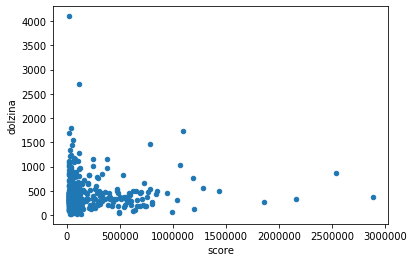

In [11]:
knjige.plot.scatter('score', 'dolzina')

In [12]:
knjige[knjige.dolzina < 600].naslov.count()

414

Poglejmo diagram za knjige dolžine manj kot 600 strani, saj je v tem območju večina knjig, in sicer 414 od 500.

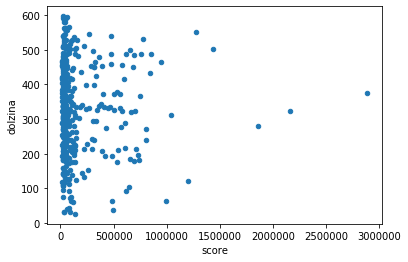

In [13]:
knjige[knjige.dolzina < 600].plot.scatter('score', 'dolzina')

2. Preverimo za povprečno oceno

* Vzamemo knjige z več kot 300 stranmi

In [14]:
knjige[knjige.dolzina > 300].avgrating.mean()

4.11130303030303

* Vzamemo knjige z 300 ali manj stranmi.

In [15]:
knjige[knjige.dolzina <= 300].avgrating.mean()

4.016411764705882

Tudi pri povprečni oceni vidimo, da imajo knjige z več kot 300 stranmi višjo oceno.

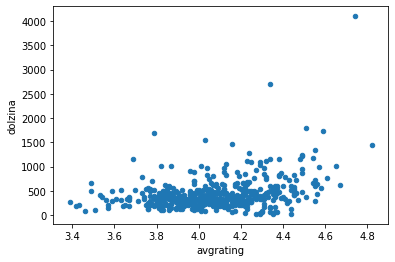

In [16]:
knjige.plot.scatter('avgrating', 'dolzina')

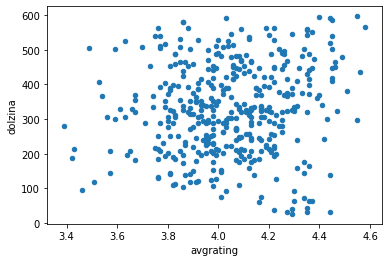

In [17]:
knjige[knjige.dolzina < 600].plot.scatter('avgrating', 'dolzina')

#### 2.2 Druga hipoteza

Ali obstaja povezava med številom glasov in številom prejetih nagrad?

V razpredelnico knjig dodamo stolpec s številom nagrad.

In [18]:
nagrade

,nagrada
knjiga,
11,NaN
155,PEN Translation Prize for Richard Pevear &amp;...
297,Odyssey Award Nominee (2008)
297,Prêmio Jabuti Nominee for Adaptação (2017)
297,Audie Award for Classic (2008)
...,...
46025094,Iowa Teen Award (2009)
46025094,Massachusetts Children's Book Award (2008)
46025094,Grand Canyon Reader Award for Tween Book (2008)


In [19]:
stevilo_nagrad = nagrade.groupby('knjiga').count().sort_values('nagrada')
stevilo_nagrad

,nagrada
knjiga,
11,0
3421809,0
3458106,0
4971790,0
5140074,0
...,...
11387515,24
5043803,25
12970552,27


In [20]:
knjige['stevilo_nagrad'] = stevilo_nagrad

Ker nisem dobil podatka o številu nagrad za vse knjige, rezultat ne bo najbolj zanesljiv.

In [21]:
knjige.sort_values('desetletje')

,naslov,dolzina,leto,leto_original,score,glasovi,avgrating,ratings,reviews,desetletje,stevilo_nagrad
id,,,,,,,,,,,
26132,The Iliad/The Odyssey,1556,1999,-800.0,57334,758,4.03,58865,707,-800.0,0
34068470,The Odyssey,541,2006,-700.0,475084,5226,3.75,801717,10748,-700.0,3
57854,Tao Te Ching,160,1989,-600.0,27779,355,4.31,100696,4266,-600.0,0
3401521,The Republic,416,2003,-380.0,18234,269,3.93,149414,3049,-380.0,0
75303,Qurʾan / القرآن الكريم,604,650,600.0,31495,356,4.34,53697,2889,600.0,0
...,...,...,...,...,...,...,...,...,...,...,...
40938263,زندگی مه آلود پریا,204,2015,NaN,39342,396,3.92,922,132,NaN,0
41637836,The Subtle Knife,326,1997,NaN,24679,332,4.13,322932,8052,NaN,2
42844155,Harry Potter and the Sorcerer's Stone,322,1997,NaN,582499,6212,4.47,6185616,98411,NaN,27


Povezava števila točk `(score)` in števila nagrad.

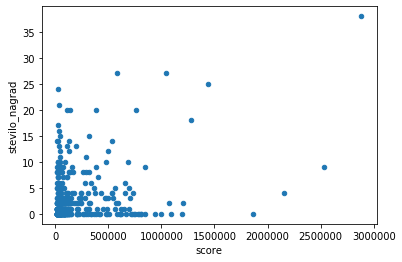

In [22]:
knjige.plot.scatter('score', 'stevilo_nagrad')

Graf ne prikazuje nobene strukture, ki bi jo pričakovali, saj ima veliko knjig z dosti nagradami nizko število točk. Vidimo pa da ima knjiga z največ nagradami tudi navišje število točk.

Povezava števila ocen `ratings` in števila nagrad

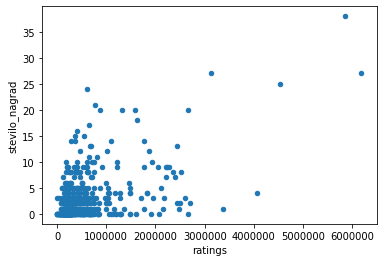

In [23]:
knjige.plot.scatter('ratings', 'stevilo_nagrad')

Enako kot pri številu točk, tudi tukaj ni neke očitne povezave med številom nagrad in številom ocen.

#### 2.3 Tretja hipoteza

Ali ljudje raje berejo fantazijo kot klasiko?

združimo razpredelnico knjig in razpredelnico žanrov.

In [24]:
knjige_z_zanri = pd.merge(knjige, zanri, left_on = 'id', right_on = 'knjiga')
knjige_z_zanri.sort_values('score', ascending=False).head(20)

,naslov,dolzina,leto,leto_original,score,glasovi,avgrating,ratings,reviews,desetletje,stevilo_nagrad,knjiga,zanr
2302,The Hunger Games,374,2008,NaN,2884374,29404,4.33,5846150,164176,NaN,38,18626858,Fantasy
2301,The Hunger Games,374,2008,NaN,2884374,29404,4.33,5846150,164176,NaN,38,18626858,Dystopia
2300,The Hunger Games,374,2008,NaN,2884374,29404,4.33,5846150,164176,NaN,38,18626858,Fiction
2303,The Hunger Games,374,2008,NaN,2884374,29404,4.33,5846150,164176,NaN,38,18626858,Science Fiction
2304,The Hunger Games,374,2008,NaN,2884374,29404,4.33,5846150,164176,NaN,38,18626858,Young Adult
2438,Harry Potter and the Order of the Phoenix,870,2004,2003.0,2535490,25939,4.49,2221446,36886,2000.0,9,29411529,Young Adult
2439,Harry Potter and the Order of the Phoenix,870,2004,2003.0,2535490,25939,4.49,2221446,36886,2000.0,9,29411529,Fiction
2440,Harry Potter and the Order of the Phoenix,870,2004,2003.0,2535490,25939,4.49,2221446,36886,2000.0,9,29411529,Fantasy
2356,To Kill a Mockingbird,324,2006,1960.0,2157865,22194,4.27,4058434,84351,1960.0,4,22024583,Academic
2354,To Kill a Mockingbird,324,2006,1960.0,2157865,22194,4.27,4058434,84351,1960.0,4,22024583,Historical Fiction


In [25]:
najbolj_popularni_zanri = knjige_z_zanri.groupby('zanr').score.mean().sort_values(ascending = False).head(20)
najbolj_popularni_zanri

zanr
Historical Romance    943951.500000
Read For School       498994.250000
High School           489499.666667
Canada                347676.500000
Gothic                330873.250000
Dystopia              303669.136364
French Literature     301058.333333
Supernatural          284010.000000
Classic Literature    283672.300000
Academic              266174.148148
Feminism              265427.750000
Kids                  263262.500000
Russia                251129.875000
Teen                  249393.714286
Paranormal Romance    246780.714286
Spanish Literature    242742.000000
Steampunk             242615.000000
Picture Books         238133.583333
Adult                 237274.500000
Science Fiction       224378.089552
Name: score, dtype: float64

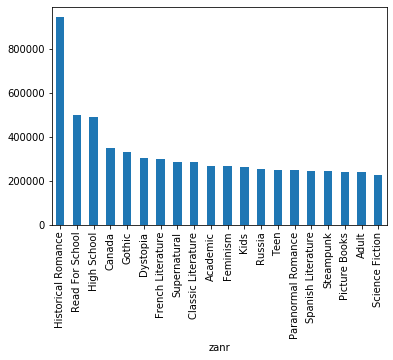

In [26]:
najbolj_popularni_zanri.plot.bar()

Vidimo, da je na prvem mestu Historical Romance, vendar ima ta žanr le 2 vnosa, zato vzemimo žanre, ki imajo vsaj 30 vnosov, da bodo naši rezultati bolj zanesljivi.

In [27]:
stevilo_knjig_zanra = zanri.groupby('zanr').count().sort_values('knjiga', ascending = False).rename(columns = {'knjiga' : 'stevilo_zanrov'}).head(20)
stevilo_knjig_zanra

,stevilo_zanrov
zanr,
Fiction,419
Classics,261
Fantasy,188
Young Adult,162
Historical,121
Historical Fiction,109
Romance,107
Literature,105
Science Fiction,67


In [28]:
knjige_s_stevilom_zanrov = pd.merge(knjige_z_zanri, stevilo_knjig_zanra, on = 'zanr')
knjige_s_stevilom_zanrov


,naslov,dolzina,leto,leto_original,score,glasovi,avgrating,ratings,reviews,desetletje,stevilo_nagrad,knjiga,zanr,stevilo_zanrov
0,The Hitchhiker's Guide to the Galaxy,193,2007,1979.0,424228,2622,4.22,1275619,26678,1970.0,0,11,Classics,261
1,Anna Karenina,964,2012,1877.0,120336,1332,4.04,603810,21580,1870.0,1,155,Classics,261
2,Treasure Island,311,2001,1882.0,73628,996,3.83,365648,10164,1880.0,3,297,Classics,261
3,Memoirs of a Geisha,434,2005,1997.0,842308,8781,4.10,1599484,28219,1990.0,0,929,Classics,261
4,Hamlet,289,2005,1603.0,20711,264,4.02,666646,11331,1600.0,1,1432,Classics,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,Beautiful Creatures,563,2009,NaN,30946,382,3.76,510016,21700,NaN,5,17280346,Paranormal,40
1946,City of Heavenly Fire,725,2014,NaN,23586,294,4.46,255744,22039,NaN,2,18629142,Paranormal,40
1947,Obsidian,335,2012,2011.0,27742,312,4.20,206553,16914,2010.0,0,22084431,Paranormal,40
1948,The Iron King,363,2010,NaN,17884,215,3.91,178658,11363,NaN,2,22818666,Paranormal,40


In [29]:
najbolj_popularni_zanri_natancno = knjige_s_stevilom_zanrov[knjige_s_stevilom_zanrov.stevilo_zanrov >= 30].groupby('zanr').score.mean().sort_values(ascending = False).head(20)
najbolj_popularni_zanri_natancno

zanr
Science Fiction       224378.089552
Classics              193617.130268
Young Adult           191901.981481
Childrens             188419.310345
Fiction               184186.064439
Fantasy               180163.792553
Historical Fiction    179166.642202
Novels                178056.975000
Historical            176975.190083
Romance               173982.233645
Literature            164445.590476
Adventure             132245.117647
Cultural              124513.214286
Paranormal            121817.200000
Contemporary          119559.500000
Mystery               113818.789474
Name: score, dtype: float64

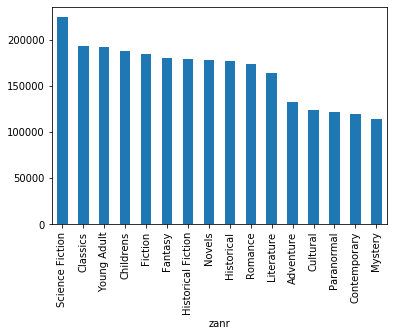

In [30]:
najbolj_popularni_zanri_natancno.plot.bar()

Vidimo, da so znanstveno fantastične knjige najbolj popularnem, klasike pa so na drugem mestu in bolj popularne od fantazije.

#### 2.4 Četrta hipoteza

Povprečna starost avtorjev, ko je njihova uspešnica izšla, je višja od 40 let.

In [31]:
knjige_z_avtorji

,ime,starost,leto_rojstva,knjiga,oseba,naslov,dolzina,leto,leto_original,score,glasovi,avgrating,ratings,reviews
0,Douglas Adams,49.0,1952.0,11,4,The Hitchhiker's Guide to the Galaxy,193,2007,1979.0,424228,2622,4.22,1275619,26678
1,Douglas Adams,49.0,1952.0,386162,4,The Hitchhiker's Guide to the Galaxy,216,2005,1979.0,606690,8037,4.22,1275619,26678
2,Douglas Adams,49.0,1952.0,9359913,4,The Ultimate Hitchhiker's Guide to the Galaxy,815,2002,1996.0,95274,1120,4.38,264978,4965
3,Bill Bryson,68.0,1951.0,437143,7,A Short History of Nearly Everything,544,2004,2003.0,33798,407,4.20,260334,11045
4,Edith Wharton,75.0,1862.0,545294,16,The Age of Innocence,293,2004,1920.0,21388,299,3.94,131124,6096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,David Mitchell,51.0,1969.0,6794,6538289,Cloud Atlas,509,2004,2004.0,26174,315,4.02,199589,18526
496,Andy Weir,NaN,NaN,18401393,6540057,The Martian,369,2014,2012.0,23376,274,4.40,717335,69576
497,Ann Patchett,56.0,1963.0,4906348,7136914,Bel Canto,352,2005,2001.0,32984,398,3.93,225952,14032
498,William Paul Young,64.0,1955.0,40874325,15481463,The Shack,252,2007,2007.0,50604,601,3.76,497354,32121


In [32]:
originali = knjige_z_avtorji[['ime','leto_original']].dropna()

In [33]:
originali

,ime,leto_original
0,Douglas Adams,1979.0
1,Douglas Adams,1979.0
2,Douglas Adams,1996.0
3,Bill Bryson,2003.0
4,Edith Wharton,1920.0
...,...,...
494,Kahlil Gibran,1923.0
495,David Mitchell,2004.0
496,Andy Weir,2012.0
497,Ann Patchett,2001.0


In [34]:
rojstva = knjige_z_avtorji[['ime', 'leto_rojstva']].dropna()

In [35]:
rojstva

,ime,leto_rojstva
0,Douglas Adams,1952.0
1,Douglas Adams,1952.0
2,Douglas Adams,1952.0
3,Bill Bryson,1951.0
4,Edith Wharton,1862.0
...,...,...
493,Robert Munsch,1945.0
494,Kahlil Gibran,1883.0
495,David Mitchell,1969.0
497,Ann Patchett,1963.0


In [36]:
original_in_rojstvo = pd.merge(originali, rojstva, on='ime')

In [37]:
original_in_rojstvo

,ime,leto_original,leto_rojstva
0,Douglas Adams,1979.0,1952.0
1,Douglas Adams,1979.0,1952.0
2,Douglas Adams,1979.0,1952.0
3,Douglas Adams,1979.0,1952.0
4,Douglas Adams,1979.0,1952.0
...,...,...,...
638,Robert Munsch,1986.0,1945.0
639,Kahlil Gibran,1923.0,1883.0
640,David Mitchell,2004.0,1969.0
641,Ann Patchett,2001.0,1963.0


In [38]:
original_in_rojstvo['izdaja'] = original_in_rojstvo.leto_original.apply(int) - original_in_rojstvo.leto_rojstva.apply(int)

In [39]:
original_in_rojstvo

,ime,leto_original,leto_rojstva,izdaja
0,Douglas Adams,1979.0,1952.0,27
1,Douglas Adams,1979.0,1952.0,27
2,Douglas Adams,1979.0,1952.0,27
3,Douglas Adams,1979.0,1952.0,27
4,Douglas Adams,1979.0,1952.0,27
...,...,...,...,...
638,Robert Munsch,1986.0,1945.0,41
639,Kahlil Gibran,1923.0,1883.0,40
640,David Mitchell,2004.0,1969.0,35
641,Ann Patchett,2001.0,1963.0,38


In [40]:
original_in_rojstvo.groupby('ime').izdaja.mean().mean()

43.875345622119816

#### Rezultat

Povprečna starost avtorjev, ko so izdali svojo uspešnico, je 43.875 let, kar potrjuje našo hipotezo.

Poglejmo povprečno starost avtorjev za vsak žanr posebej.

In [41]:
pd.merge(pd.merge(knjige_z_avtorji, 
         original_in_rojstvo, 
         left_on='ime', right_on='ime'
        ), 
         zanri,
         left_on='knjiga', right_on='knjiga'
        ).groupby(['zanr']).izdaja.mean().sort_values(ascending=False)

zanr
Portuguese Literature    73.000000
Portugal                 73.000000
18th Century             65.000000
High Fantasy             58.333333
Spanish Literature       58.000000
                           ...    
Paranormal Romance       32.000000
Shapeshifters            32.000000
Time Travel              29.000000
Italy                    29.000000
High School              29.000000
Name: izdaja, Length: 141, dtype: float64

#### 2.5 Peta hipoteza

Ocena v odvisnosti od leta

In [61]:
knjige[knjige.leto_original > 1800].naslov.count()



385

V izračunih ne bomo upoštevali knjig, napisanih pred letom 1800, saj te ne predstavljajo velikega deleža vseh podatkov.

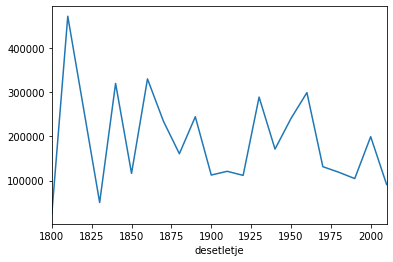

In [62]:
knjige[knjige.leto_original > 1800].groupby('desetletje').score.mean().plot()

Vidimo, da graf nima nobene lepe strukture. Kar je mogoče presenetljivo je, da je ocena knjig, napisanih v zadnjem desetletju, močno upadla.